# 线性模型

最简单最基本的模型，$\hat{y}=x*\omega+b $

定义损失函数为：$loss=\sum(\hat{y}-y)^2=\sum(x*\omega-y)^2$

对不同的$\omega$进行遍历，算出损失，找到最小的$\omega$

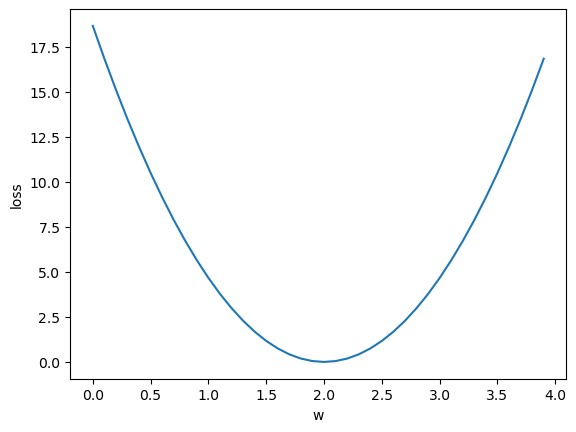

In [2]:
import numpy as np
import matplotlib.pylab as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

def forward(x):
    return x * w
    
def loss(x, y):
    return (forward(x) - y) ** 2

w_list = []
mse_list = []
for w in np.arange(0.0, 4.0, 0.1):
    # print('w=', w)
    l_sum = 0.0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        loss_val = loss(x_val, y_val)
        l_sum += loss_val
        # print('\t', x_val, y_val, y_pred_val, loss_val)
    # print('MSE=', l_sum / len(x_data))
    w_list.append(w)
    mse_list.append(l_sum / 3)
    
plt.plot(w_list, mse_list)
plt.ylabel('loss')
plt.xlabel('w')
plt.show()

# 梯度下降算法

<img src = './Image/Pytorch深度学习实践/梯度下降.png' width = 400 align = right>
对于函数而言，梯度有$\nabla f = \frac{\partial f}{\partial x}$

对于当前的$\omega$，如果梯度大于0，说明误差在增大，否则误差在减小，故下一个取得的$\omega$为：

$\omega = \omega - \alpha * \frac{\partial f}{\partial x}$，其中$\alpha$参数称作学习率(学习率不能太大，否则会直接越过最低点)

梯度下降实际上是一种贪心算法，它得到的是局部区域的一个最优结果，如果损失函数不是一个“凸函数”，可能得不到最好的结果

现实中，太多的局部最优解其实很少见，更常见的是“鞍点”——梯度向量为0的点，在二维平面里，会出现无法继续迭代的现象，在三维即更高的空间里，可能出现从一个面看是最高点，而另一个面是最低点

<img src = './Image/Pytorch深度学习实践/鞍点.jpg' width = 400>

在cost函数中：
$$\frac{\partial cost(\omega)}{\partial \omega} = \frac{\partial}{\partial \omega} \frac{1}{N}\sum_{n=1}^N(x_n*\omega-y_n)^2 = \frac{1}{N}\sum_{n=1}^N2x_n(x_n*w-y_n)
$$
则
$$\omega = \omega - \alpha * \frac{\partial f}{\partial x} = \omega - \alpha * \frac{1}{N}\sum_{n=1}^N2x_n(x_n*w-y_n)$$

## 随机梯度下降算法
不采取整体的cost的梯度，而采取随机一个样本的loss的梯度，避免整体的梯度为0带来的鞍点导致无法更新$\omega$
+ 优点：避免了鞍点，性能好
+ 缺点：整体梯度下降可以采用并行计算最后汇总，而随机算法因为每次都会迭代更新$\omega$，如果要达到同样的训练此数，只能用循环 时间慢

解决方法：
+ 将原数据(batch)分组(mini_batch)，对每组用整体计算cost，然后随机挑选一组的cost

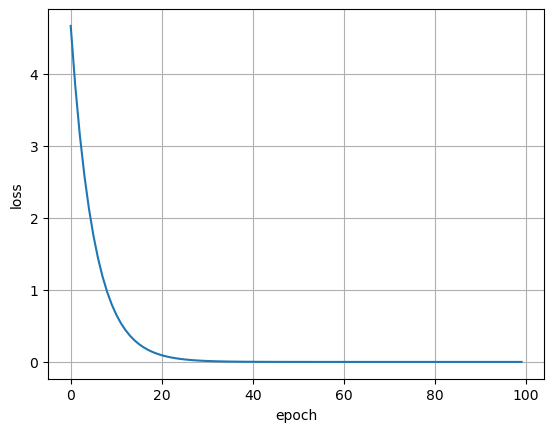

In [4]:
# 梯度下降算法
import matplotlib.pyplot as plt

# prepare the training set
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

# initial guess of weight
w = 1.0


# define the model linear model y = w*x
def forward(x):
    return x * w


#define the cost function MSE
def cost(xs, ys):
    cost = 0
    for x, y in zip(xs, ys):
        y_pred = forward(x)
        cost += (y_pred - y)**2
    return cost / len(xs)


# define the gradient function  gd
def gradient(xs, ys):
    grad = 0
    for x, y in zip(xs, ys):
        grad += 2 * x * (x * w - y)
    return grad / len(xs)


epoch_list = []
cost_list = []
# print('predict (before training)', 4, forward(4))
for epoch in range(100):
    cost_val = cost(x_data, y_data)
    grad_val = gradient(x_data, y_data)
    w -= 0.01 * grad_val  # 0.01 learning rate
    # print('epoch:', epoch, 'w=', w, 'loss=', cost_val)
    epoch_list.append(epoch)
    cost_list.append(cost_val)

# print('predict (after training)', 4, forward(4))
plt.plot(epoch_list, cost_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.show()

# 反向传播与pytorch初步实现

# pytorch运用